# Day 4 hw
# Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Load the data files

In [2]:
f1= pd.read_csv("https://www.dropbox.com/s/g47l2r2kmjfzst2/aau1043_dnm.tsv?dl=1")
f1

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
f2=pd.read_csv("https://www.dropbox.com/s/vxc4tw1qv7j4s4h/aau1043_parental_age.tsv?dl=1")
f2

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [4]:
# f1.loc[:,"Phase_combined"]
# pat_dnm= f1.loc[:"father"]
# pat_dnm

In [5]:
x=f1.loc[:,"Proband_id"]
x.value_counts()
total_dnm = x.value_counts()
total_dnm.rename("total_muts", inplace=True)

91410     122
114094    121
111288    115
8147      114
88246     113
         ... 
121087     37
62630      34
76504      34
37789      34
13990      33
Name: total_muts, Length: 396, dtype: int64

# Count for paternal proband IDs

In [6]:
father=f1.loc[:,"Phase_combined"] == "father"
pat_dnm= f1.loc[father,:]
pat_dnm2=pat_dnm.loc[:,"Proband_id"]
pat_dnm2.value_counts()

91410     111
114094     98
111288     93
99984      91
64166      88
         ... 
76504      27
1097       26
13990      25
36430      25
37789      17
Name: Proband_id, Length: 396, dtype: int64

In [7]:
mother=f1.loc[:,"Phase_combined"] == "mother"
mat_dnm= f1.loc[mother,:]
mat_dnm2=mat_dnm.loc[:,"Proband_id"]
mat_dnm2.value_counts()

112917    32
13191     31
101332    30
142988    29
14991     28
          ..
93086      4
130614     3
37789      3
113829     3
121087     1
Name: Proband_id, Length: 396, dtype: int64

# merge the data frame

In [8]:
pat_dnm3=pat_dnm2.value_counts()
pat_dnm3.rename('father_muts', inplace=True)

91410     111
114094     98
111288     93
99984      91
64166      88
         ... 
76504      27
1097       26
13990      25
36430      25
37789      17
Name: father_muts, Length: 396, dtype: int64

In [9]:
#pat_dnm2.rename('Proband_id', inplace=True)

In [11]:
mat_dnm3=mat_dnm2.value_counts()
mat_dnm3.rename('mother_muts', inplace=True)

112917    32
13191     31
101332    30
142988    29
14991     28
          ..
93086      4
130614     3
37789      3
113829     3
121087     1
Name: mother_muts, Length: 396, dtype: int64

In [12]:
# merge1=f2.merge(pat_dnm3, left_on="Proband_id", right_on="Proband_id")

concat = pd.concat([pat_dnm3, mat_dnm3, total_dnm], axis=1)
concat['Proband_id'] = concat.index

concat
# f2.merge(concat, left_on='Proband_id')

,father_muts,mother_muts,total_muts,Proband_id
675,51,19,70,675
1097,26,12,39,1097
1230,42,12,57,1230
1481,53,14,68,1481
1806,61,11,78,1806
...,...,...,...,...
153657,41,8,49,153657
154565,61,14,75,154565
154621,39,11,50,154621
154810,55,14,69,154810


In [13]:
merge1=f2.merge(concat, left_on='Proband_id', right_on='Proband_id')
merge1

,Proband_id,Father_age,Mother_age,father_muts,mother_muts,total_muts
0,675,31,36,51,19,70
1,1097,19,19,26,12,39
2,1230,30,28,42,12,57
3,1481,32,20,53,14,68
4,1806,38,34,61,11,78
...,...,...,...,...,...,...
391,153657,27,23,41,8,49
392,154565,36,30,61,14,75
393,154621,19,18,39,11,50
394,154810,32,28,55,14,69


# plot the mutations vs age

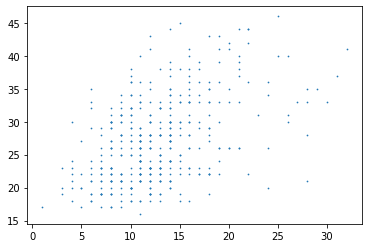

In [20]:
m_x=merge1.loc[:,"mother_muts"]
m_y=merge1.loc[:,"Mother_age"]
fig,ax=plt.subplots()
ax.scatter(m_x,m_y,s=0.5)
plt.show()

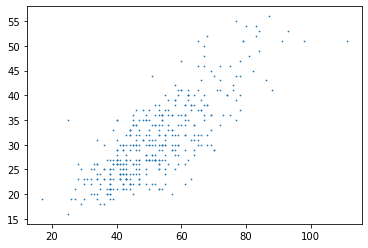

In [21]:
f_x=merge1.loc[:,"father_muts"]
f_y=merge1.loc[:,"Father_age"]
fig,ax=plt.subplots()
ax.scatter(f_x,f_y,s=0.5)
plt.show()

In [28]:
model_1=smf.ols(formula = "mother_muts ~ 1 + Mother_age",data=merge1)
results=model_1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            mother_muts   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           6.88e-24
Time:                        13:50:33   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model_1=smf.ols(formula = "father_muts ~ 1 + Father_age",data=merge1)
results=model_1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            father_muts   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.55e-84
Time:                        13:51:07   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

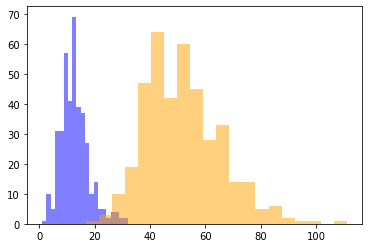

In [34]:
m_m=merge1.loc[:,"mother_muts"]
f_m=merge1.loc[:,"father_muts"]
fig,ax=plt.subplots()
ax.hist(m_m, color='blue', alpha=0.5,bins=20)
ax.hist(f_m, color='orange', alpha=0.5, bins=20)
plt.show()

In [39]:
merge1

,Proband_id,Father_age,Mother_age,father_muts,mother_muts,total_muts
0,675,31,36,51,19,70
1,1097,19,19,26,12,39
2,1230,30,28,42,12,57
3,1481,32,20,53,14,68
4,1806,38,34,61,11,78
...,...,...,...,...,...,...
391,153657,27,23,41,8,49
392,154565,36,30,61,14,75
393,154621,19,18,39,11,50
394,154810,32,28,55,14,69


In [38]:
stats.ttest_ind(merge1["mother_muts"][merge1["Mother_age"]], 
                merge1["father_muts"][merge1["Father_age"]])

Ttest_indResult(statistic=-43.49654811213675, pvalue=7.132371017512236e-212)

# Yes the number of mutation between maternal and paternal is mutation is significantly different.

# Possion regression

In [49]:
model_2=smf.poisson(formula = "mother_muts ~ 1 + Mother_age",data=merge1)
results_2=model_2.fit()
results_2.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:            mother_muts   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                 0.07164
Time:                        15:11:56   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [50]:
results_2.pvalues

Intercept     6.989401e-188
Mother_age     5.133524e-42
dtype: float64

In [51]:
model_3=smf.poisson(formula = "father_muts ~ 1 + Father_age",data=merge1)
results_3=model_3.fit()
results_3.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:            father_muts   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.2277
Time:                        15:12:11   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [52]:
results_3.pvalues

Intercept      0.000000e+00
Father_age    1.169940e-192
dtype: float64

In [54]:
3.1903+0.0241*50.5

4.40735